### 2015

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

In [2]:
# hiển thị tổng quan dữ liệu
data_raw_2015.info()
data_raw_2015.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,164.0
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,40.250000,4.526000,0.037268,0.545808,0.856822,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0


In [3]:
print("Kích thước DataFrame bao gồm: %2d hàng, %2d cột" % data_raw_2015.shape)
data_raw_2015.head()

Kích thước DataFrame bao gồm: 164 hàng, 13 cột


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [4]:
# hiển thị tổng quan dữ liệu
print("Kích thước DataFrame bao gồm: %2d hàng, %2d cột" % data_raw_2015.shape)

Kích thước DataFrame bao gồm: 164 hàng, 13 cột


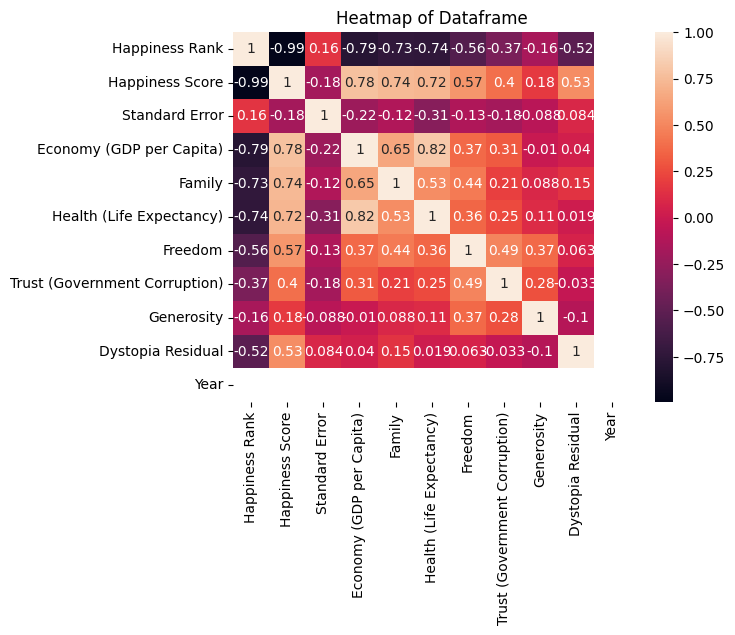

In [5]:
# vẽ biểu đồ đo độ tương quan giữa các cột 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

corri_df = data_raw_2015.copy()

# tính toán ma trận corrilation 
corr = corri_df.iloc[:, 2:].corr()

# Vẽ heatmap
sns.heatmap(corr, annot=True)
plt.title("Heatmap of Dataframe")
plt.show()

> Loại bỏ 6 hàng cuối: 
+ Thiếu thông tin, các hàng này chỉ có cột "Country" và "Year" là có thông tin, mà "Country" là cột biến rời rạc không thứ cấp, hơn nữa cột "Year" là cột chứa hằng số. Vì vậy nó không mang ý nghĩa tương quan với keycolumns. 
+ Nhiễu dữ liệu: Nếu như chúng ta fill dữ liệu vào các vị trí còn thiếu, có thể gây ra nhiễu hoặc thuật toán có thể không hiểu được quan hệ giữa các biến. 

In [6]:
# drop 6 hàng cuối
data_process = data_raw_2015.drop(data_raw_2015.index[158:])

# hiển thị tổng quan dữ liệu
data_process.info()
data_process.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,40.250000,4.526000,0.037268,0.545808,0.856822,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0


In [8]:
# chuẩn hóa cột dữ liệu "Country" để tránh tình trạng bị trùng lặp
country_column = data_process['Country'].str.lower().to_list()
len(country_column)

unique_country = []
duplicate_index = []

for i, country in enumerate(country_column):
    if country not in unique_country: 
        unique_country.append(country)
    elif country in unique_country: 
        duplicate_index.append(i)
        
print(duplicate_index)

[]


In [9]:
# tìm giá trị ngoại lệ
outliers_df = data_process.copy()

# Tính phân vị thứ nhất (25%), thứ ba (75%) và IQR cho các cột dữ liệu
Q1 = outliers_df.iloc[:, 3:12].quantile(0.25)
Q3 = outliers_df.iloc[:, 3:12].quantile(0.75)
IQR = Q3 - Q1

# Xác định giá trị ngoại lệ cho các cột dữ liệu
outliers = (outliers_df.iloc[:, 3:12] < (Q1 - 1.5 * IQR)) | (outliers_df.iloc[:, 3:12] > (Q3 + 1.5 * IQR))

# In ra các giá trị ngoại lệ cho các cột dữ liệu
outliers

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,True,False,True
154,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,True
156,False,True,False,False,False,False,False,False,False


In [10]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Xử lý ngoại lệ bằng phương pháp Winsorize cho từng cột
for col in outliers_df.columns[4:]:
    outliers_df[col] = winsorize(outliers_df[col], limits=[0.1, 0.1])

# In ra DataFrame mới đã được xử lý ngoại lệ
outliers_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.32944,1.29704,0.90943,0.62545,0.32957,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.29704,0.90943,0.62545,0.14145,0.42192,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.29704,0.87464,0.62545,0.32957,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.32944,1.29704,0.88521,0.62545,0.32957,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.29704,0.90563,0.62545,0.32957,0.42192,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154.0,3.465,0.03464,0.25812,0.77370,0.42864,0.59201,0.32957,0.22628,1.44395,2015
154,Benin,Sub-Saharan Africa,155.0,3.340,0.03656,0.28665,0.60429,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156.0,3.006,0.05015,0.66320,0.60429,0.72193,0.22815,0.18906,0.42192,1.44395,2015
156,Burundi,Sub-Saharan Africa,157.0,2.905,0.06913,0.25812,0.60429,0.24009,0.22815,0.10062,0.19727,1.83302,2015


--> Nhận thấy "Happiness Rank" đơn giản chỉ sắp xếp theo 'Happiness Scores'. Vì vậy nó không đóng góp gì cho việc dự đoán 'Happiness Scores'.
--> 'Standard Error' có mối tương quan thấp nhất, và chỉ nói lên độ lệch chuẩn của giá trị 'Happiness Scores' vì vậy ta cũng cần loại bỏ để dữ liệu clean hơn. 
--> Tương tự như vậy, 'Generosity' là chỉ số đánh giá mức độ đóng góp của việc hào phóng với giá trị hạnh phúc cũng có giá trị corrilation với các cột thấp. 

In [11]:
df_2015_clean = outliers_df.copy()

df_2015_clean = df_2015_clean.drop(columns=['Standard Error', 'Generosity', 'Happiness Rank', 'Dystopia Residual'])

df_2015_clean

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,Switzerland,Western Europe,7.587,1.32944,1.29704,0.90943,0.62545,0.32957,2015
1,Iceland,Western Europe,7.561,1.30232,1.29704,0.90943,0.62545,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.29704,0.87464,0.62545,0.32957,2015
3,Norway,Western Europe,7.522,1.32944,1.29704,0.88521,0.62545,0.32957,2015
4,Canada,North America,7.427,1.32629,1.29704,0.90563,0.62545,0.32957,2015
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.25812,0.77370,0.42864,0.59201,0.32957,2015
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.60429,0.31910,0.48450,0.08010,2015
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.60429,0.72193,0.22815,0.18906,2015
156,Burundi,Sub-Saharan Africa,2.905,0.25812,0.60429,0.24009,0.22815,0.10062,2015


### 2016

In [12]:
# hiển thị tổng quan dữ liệu
data_raw_2016.info()
data_raw_2016.describe()

print("Kích thước DataFrame bao gồm: %2d hàng, %2d cột" % data_raw_2016.shape)
data_raw_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    float64
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [13]:
# hiển thị tổng quan dữ liệu
print("Kích thước DataFrame bao gồm: %2d hàng, %2d cột" % data_raw_2016.shape)

Kích thước DataFrame bao gồm: 164 hàng, 14 cột


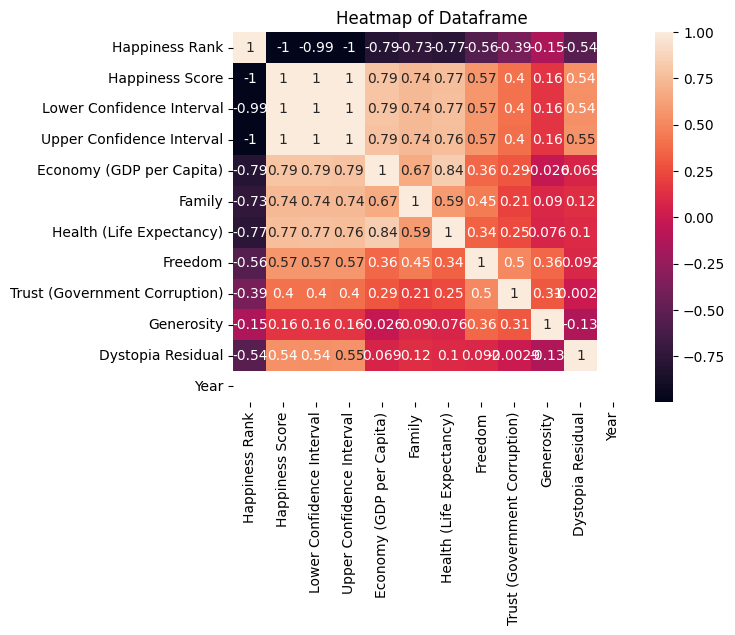

In [14]:
# vẽ biểu đồ đo độ tương quan giữa các cột 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

corri_df = data_raw_2016.copy()

# tính toán ma trận corrilation 
corr = corri_df.iloc[:, 2:].corr()

# Vẽ heatmap
sns.heatmap(corr, annot=True)
plt.title("Heatmap of Dataframe")
plt.show()

> Loại bỏ 6 hàng cuối: 
+ Thiếu thông tin, các hàng này chỉ có cột "Country" và "Year" là có thông tin, mà "Country" là cột biến rời rạc không thứ cấp, hơn nữa cột "Year" là cột chứa hằng số. Vì vậy nó không mang ý nghĩa tương quan với keycolumns. 
+ Nhiễu dữ liệu: Nếu như chúng ta fill dữ liệu vào các vị trí còn thiếu, có thể gây ra nhiễu hoặc thuật toán có thể không hiểu được quan hệ giữa các biến. 

In [15]:
# drop 6 hàng cuối
data_process = data_raw_2016.drop(data_raw_2016.index[157:])

# hiển thị tổng quan dữ liệu
data_process.info()
data_process.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    float64
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,2016.0
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220,0.0
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890,2016.0
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710,2016.0
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740,2016.0
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650,2016.0
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720,2016.0


In [16]:
# chuẩn hóa cột dữ liệu "Country" để tránh tình trạng bị trùng lặp
country_column = data_process['Country'].str.lower().to_list()
print(len(country_column))

unique_country = []
duplicate_index = []

for i, country in enumerate(country_column):
    if country not in unique_country: 
        unique_country.append(country)
    elif country in unique_country: 
        duplicate_index.append(i)
        
print(duplicate_index)

157
[]


In [17]:
# tìm giá trị ngoại lệ
outliers_df = data_process.copy()

# Tính phân vị thứ nhất (25%), thứ ba (75%) và IQR cho các cột dữ liệu
Q1 = outliers_df.iloc[:, 3:12].quantile(0.25)
Q3 = outliers_df.iloc[:, 3:12].quantile(0.75)
IQR = Q3 - Q1

# Xác định giá trị ngoại lệ cho các cột dữ liệu
outliers = (outliers_df.iloc[:, 3:12] < (Q1 - 1.5 * IQR)) | (outliers_df.iloc[:, 3:12] > (Q3 + 1.5 * IQR))

# In ra các giá trị ngoại lệ cho các cột dữ liệu
outliers

,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
154,False,False,False,False,True,False,False,False,False
155,False,False,False,False,False,False,False,False,False


In [18]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Xử lý ngoại lệ bằng phương pháp Winsorize cho từng cột
for col in outliers_df.columns[4:]:
    outliers_df[col] = winsorize(outliers_df[col], limits=[0.1, 0.1])

# In ra DataFrame mới đã được xử lý ngoại lệ
outliers_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,6.875,7.058,1.44178,1.08764,0.79504,0.55225,0.31329,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,6.875,7.058,1.44443,1.08764,0.83096,0.55225,0.31329,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,6.875,7.058,1.42666,1.08764,0.83096,0.55225,0.14975,0.44834,2.83137,2016
3,Norway,Western Europe,4.0,7.498,6.875,7.058,1.44443,1.08764,0.79579,0.55225,0.31329,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,6.875,7.058,1.40598,1.08764,0.81091,0.55225,0.31329,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153.0,3.484,3.753,3.979,0.39499,0.38595,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154.0,3.360,3.753,3.979,0.38227,0.38595,0.19625,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155.0,3.303,3.753,3.979,0.34097,0.38595,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156.0,3.069,3.753,3.979,0.74719,0.38595,0.62994,0.15412,0.17233,0.44834,1.64227,2016


--> Tương tự như năm 2015, 'Lower Confidence Interval' và 'Upper Confidence Interval' là 2 giá trị của dải mà 95% giá trị 'Happiness  Scores' sẽ nằm trong đó, vì vậy ta có thể bỏ chúng dù giá trị tương quan rất cao. 

In [19]:
df_2016_clean = outliers_df.copy()

df_2016_clean = df_2016_clean.drop(columns=['Generosity', 'Happiness Rank', 'Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'])

df_2016_clean

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,Denmark,Western Europe,7.526,1.44178,1.08764,0.79504,0.55225,0.31329,2016
1,Switzerland,Western Europe,7.509,1.44443,1.08764,0.83096,0.55225,0.31329,2016
2,Iceland,Western Europe,7.501,1.42666,1.08764,0.83096,0.55225,0.14975,2016
3,Norway,Western Europe,7.498,1.44443,1.08764,0.79579,0.55225,0.31329,2016
4,Finland,Western Europe,7.413,1.40598,1.08764,0.81091,0.55225,0.31329,2016
...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.38595,0.21028,0.39747,0.06681,2016
153,Afghanistan,Southern Asia,3.360,0.38227,0.38595,0.19625,0.16430,0.07112,2016
154,Togo,Sub-Saharan Africa,3.303,0.34097,0.38595,0.24811,0.34678,0.11587,2016
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.38595,0.62994,0.15412,0.17233,2016


### 2017

In [20]:
import pandas as pd

data_raw_2017 = pd.read_csv("wh_2017.csv")

In [21]:
# hiển thị tổng quan dữ liệu
data_raw_2017.info()
data_raw_2017.describe()

print("Kích thước DataFrame bao gồm: %2d hàng, %2d cột" % data_raw_2017.shape)
data_raw_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Happiness.Rank                 155 non-null    float64
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           164 non-null    int

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


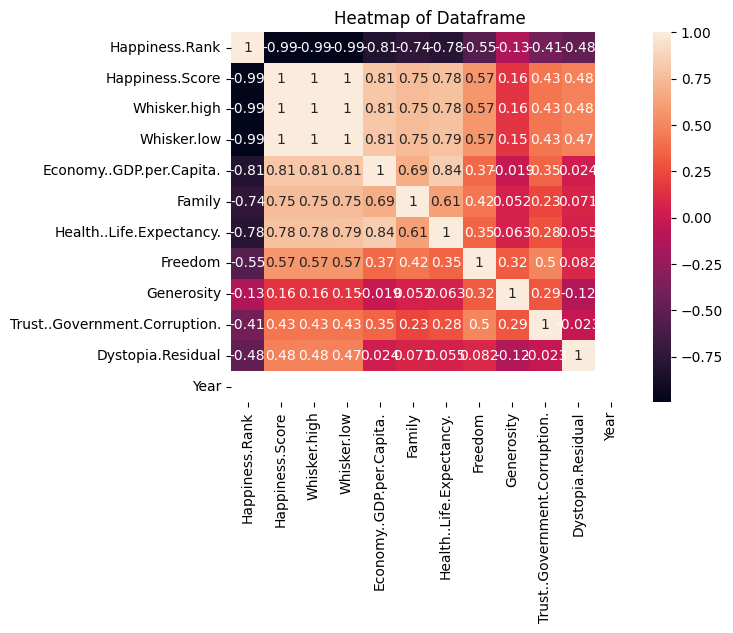

In [22]:
# vẽ biểu đồ đo độ tương quan giữa các cột 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

corri_df = data_raw_2017.copy()

# tính toán ma trận corrilation 
corr = corri_df.iloc[:, 1:].corr()

# Vẽ heatmap
sns.heatmap(corr, annot=True)
plt.title("Heatmap of Dataframe")
plt.show()

> Loại bỏ 9 hàng cuối: 
+ Thiếu thông tin, các hàng này chỉ có cột "Country" và "Year" là có thông tin, mà "Country" là cột biến rời rạc không thứ cấp, hơn nữa cột "Year" là cột chứa hằng số. Vì vậy nó không mang ý nghĩa tương quan với keycolumns. 
+ Nhiễu dữ liệu: Nếu như chúng ta fill dữ liệu vào các vị trí còn thiếu, có thể gây ra nhiễu hoặc thuật toán có thể không hiểu được quan hệ giữa các biến. 

In [24]:
# drop 9 hàng cuối
data_process = data_raw_2017.drop(data_raw_2017.index[155:])

# hiển thị tổng quan dữ liệu
data_process.info()
data_process.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    float64
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238,2017.0
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028,0.0
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,2017.0
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291,2017.0
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910,2017.0
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654,2017.0
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,2017.0


In [27]:
# Tính phân vị thứ nhất (25%), thứ ba (75%) và IQR cho các cột dữ liệu
Q1 = data_process.iloc[:, 1:].quantile(0.25)
Q3 = data_process.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1

# Xác định giá trị ngoại lệ cho các cột dữ liệu
outliers = (data_process.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (data_process.iloc[:,1:] > (Q3 + 1.5 * IQR))

# In ra các giá trị ngoại lệ cho các cột dữ liệu
outliers

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,True,True,False
151,False,False,False,False,False,True,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,True,False
153,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
import pandas as pd
from scipy.stats.mstats import winsorize

outliers_df = data_process.copy()

# Xử lý ngoại lệ bằng phương pháp Winsorize cho từng cột
for col in data_process.columns[1:]:
    data_process[col] = winsorize(data_process[col], limits=[0.1, 0.1])

# In ra DataFrame mới đã được xử lý ngoại lệ
data_process

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,16.0,6.951,7.005382,6.896619,1.487097,1.488412,0.796667,0.588767,0.362012,0.282662,2.277027,2017
1,Denmark,16.0,6.951,7.005382,6.896619,1.482383,1.488412,0.792566,0.588767,0.355280,0.282662,2.313707,2017
2,Iceland,16.0,6.951,7.005382,6.896619,1.480633,1.488412,0.830875,0.588767,0.428580,0.153527,2.322715,2017
3,Switzerland,16.0,6.951,7.005382,6.896619,1.487097,1.488412,0.830875,0.588767,0.290549,0.282662,2.276716,2017
4,Finland,16.0,6.951,7.005382,6.896619,1.443572,1.488412,0.809158,0.588767,0.245483,0.282662,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,140.0,3.795,3.951642,3.657877,0.368746,0.945707,0.326425,0.581844,0.252756,0.282662,1.313317,2017
151,Syria,140.0,3.795,3.951642,3.657877,0.777153,0.774864,0.500533,0.198303,0.428580,0.151347,1.313317,2017
152,Tanzania,140.0,3.795,3.951642,3.657877,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,1.313317,2017
153,Burundi,140.0,3.795,3.951642,3.657877,0.368610,0.774864,0.191407,0.198303,0.204435,0.084148,1.683024,2017


In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

corri_df = outliers_df.copy()

data_raw_2015 = pd.read_csv("wh_2015.csv")
data_raw_2016 = pd.read_csv("wh_2016.csv")

corri_df.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year']

country_region = pd.concat([data_raw_2015.iloc[:, [0, 1]].dropna(), data_raw_2016.iloc[:, [0, 1]].dropna()], axis=0).reset_index(drop=True).dropna().drop_duplicates()

corri_df = corri_df.merge(country_region, on="Country", how="left")

region_column = corri_df.pop("Region")
corri_df.insert(1, "Region", region_column)

In [33]:
corri_df

,Country,Region,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,Western Europe,16.0,6.951,7.005382,6.896619,1.487097,1.488412,0.796667,0.588767,0.362012,0.282662,2.277027,2017
1,Denmark,Western Europe,16.0,6.951,7.005382,6.896619,1.482383,1.488412,0.792566,0.588767,0.355280,0.282662,2.313707,2017
2,Iceland,Western Europe,16.0,6.951,7.005382,6.896619,1.480633,1.488412,0.830875,0.588767,0.428580,0.153527,2.322715,2017
3,Switzerland,Western Europe,16.0,6.951,7.005382,6.896619,1.487097,1.488412,0.830875,0.588767,0.290549,0.282662,2.276716,2017
4,Finland,Western Europe,16.0,6.951,7.005382,6.896619,1.443572,1.488412,0.809158,0.588767,0.245483,0.282662,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,140.0,3.795,3.951642,3.657877,0.368746,0.945707,0.326425,0.581844,0.252756,0.282662,1.313317,2017
151,Syria,Middle East and Northern Africa,140.0,3.795,3.951642,3.657877,0.777153,0.774864,0.500533,0.198303,0.428580,0.151347,1.313317,2017
152,Tanzania,Sub-Saharan Africa,140.0,3.795,3.951642,3.657877,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,1.313317,2017
153,Burundi,Sub-Saharan Africa,140.0,3.795,3.951642,3.657877,0.368610,0.774864,0.191407,0.198303,0.204435,0.084148,1.683024,2017


In [34]:
# chuẩn hóa cột dữ liệu "Country" để tránh tình trạng bị trùng lặp
country_column = corri_df['Country'].str.lower().to_list()
print(len(country_column))

unique_country = []
duplicate_index = []

for i, country in enumerate(country_column):
    if country not in unique_country: 
        unique_country.append(country)
    elif country in unique_country: 
        duplicate_index.append(i)
        
print(duplicate_index)

155
[]


In [35]:
df_2017_clean = corri_df.drop(columns=['Happiness Rank', 'Whisker high', 'Whisker low', 'Generosity', 'Generosity', 'Dystopia Residual'])
df_2017_clean

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,Norway,Western Europe,6.951,1.487097,1.488412,0.796667,0.588767,0.282662,2017
1,Denmark,Western Europe,6.951,1.482383,1.488412,0.792566,0.588767,0.282662,2017
2,Iceland,Western Europe,6.951,1.480633,1.488412,0.830875,0.588767,0.153527,2017
3,Switzerland,Western Europe,6.951,1.487097,1.488412,0.830875,0.588767,0.282662,2017
4,Finland,Western Europe,6.951,1.443572,1.488412,0.809158,0.588767,0.282662,2017
...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,3.795,0.368746,0.945707,0.326425,0.581844,0.282662,2017
151,Syria,Middle East and Northern Africa,3.795,0.777153,0.774864,0.500533,0.198303,0.151347,2017
152,Tanzania,Sub-Saharan Africa,3.795,0.511136,1.041990,0.364509,0.390018,0.066035,2017
153,Burundi,Sub-Saharan Africa,3.795,0.368610,0.774864,0.191407,0.198303,0.084148,2017


In [36]:
# Merge 3 dataframe
df_clean = pd.concat([df_2015_clean, df_2016_clean, df_2017_clean], keys="Country",ignore_index=True)

df_clean

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,Switzerland,Western Europe,7.587,1.329440,1.297040,0.909430,0.625450,0.329570,2015
1,Iceland,Western Europe,7.561,1.302320,1.297040,0.909430,0.625450,0.141450,2015
2,Denmark,Western Europe,7.527,1.325480,1.297040,0.874640,0.625450,0.329570,2015
3,Norway,Western Europe,7.522,1.329440,1.297040,0.885210,0.625450,0.329570,2015
4,Canada,North America,7.427,1.326290,1.297040,0.905630,0.625450,0.329570,2015
...,...,...,...,...,...,...,...,...,...
465,Rwanda,Sub-Saharan Africa,3.795,0.368746,0.945707,0.326425,0.581844,0.282662,2017
466,Syria,Middle East and Northern Africa,3.795,0.777153,0.774864,0.500533,0.198303,0.151347,2017
467,Tanzania,Sub-Saharan Africa,3.795,0.511136,1.041990,0.364509,0.390018,0.066035,2017
468,Burundi,Sub-Saharan Africa,3.795,0.368610,0.774864,0.191407,0.198303,0.084148,2017


In [38]:
df_clean['Country'] = df_clean['Country'].str.lower()
df_clean

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,switzerland,Western Europe,7.587,1.329440,1.297040,0.909430,0.625450,0.329570,2015
1,iceland,Western Europe,7.561,1.302320,1.297040,0.909430,0.625450,0.141450,2015
2,denmark,Western Europe,7.527,1.325480,1.297040,0.874640,0.625450,0.329570,2015
3,norway,Western Europe,7.522,1.329440,1.297040,0.885210,0.625450,0.329570,2015
4,canada,North America,7.427,1.326290,1.297040,0.905630,0.625450,0.329570,2015
...,...,...,...,...,...,...,...,...,...
465,rwanda,Sub-Saharan Africa,3.795,0.368746,0.945707,0.326425,0.581844,0.282662,2017
466,syria,Middle East and Northern Africa,3.795,0.777153,0.774864,0.500533,0.198303,0.151347,2017
467,tanzania,Sub-Saharan Africa,3.795,0.511136,1.041990,0.364509,0.390018,0.066035,2017
468,burundi,Sub-Saharan Africa,3.795,0.368610,0.774864,0.191407,0.198303,0.084148,2017


In [39]:
# Kiểm tra các cột trừ cột "year" có tất cả giá trị trùng nhau hay không
columns_to_check = df_clean.columns[df_clean.columns != 'year']
columns_with_same_values = []

for column in columns_to_check:
    if df_clean[column].nunique() == 1 and df_clean[column].all():
        columns_with_same_values.append(column)

if len(columns_with_same_values) > 0:
    print("Có các cột sau đây trùng nhau tất cả giá trị ngoài cột 'year':")
    for column in columns_with_same_values:
        print(column)
else:
    print("Không có cột nào trùng nhau tất cả giá trị ngoài cột 'year'.")

Không có cột nào trùng nhau tất cả giá trị ngoài cột 'year'.


In [ ]:
df_clean.to_csv('data_final.csv')